In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

C:\Users\oicmy\AppData\Local\Temp\ipykernel_89800\1341870611.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_path = '215d3c1ea7d0c562774a8c6e4b157ac0.xlsx'
data = pd.ExcelFile(file_path)

In [3]:
data.sheet_names

['2022']

In [4]:
df = data.parse('2022')

In [5]:
columns_to_extract = [
    "Odczyn pH - wartość terenowa",
    "Temperatura - wartość terenowa [°C]",
]

start_column = "Ogólny węgiel organiczny [mgC/l]"
end_column = df.columns[-2]

columns_for_mineralization = df.loc[:, start_column:end_column]

columns_for_mineralization = columns_for_mineralization.replace({',': '.'}, regex=True)
columns_for_mineralization = columns_for_mineralization.replace({r'[<>]': ''}, regex=True)
columns_for_mineralization = columns_for_mineralization.apply(pd.to_numeric, errors='coerce')

In [6]:
columns_for_mineralization.head()

,Ogólny węgiel organiczny [mgC/l],Amonowy jon [mgNH4/l],Antymon [mgSb/l],Arsen [mgAs/l],Azotany [mgNO3/l],Azotyny [mgNO2/l],Bar [mgBa/l],Beryl [mgBe/l],Bor [mgB/l],Chlorki [mgCl/l],...,Siarczany [mgSO4/l],Sód [mgNa/l],Srebro [mgAg/l],Tal [mgTl/l],Tytan [mgTi/l],Uran [mgU/l],Wanad [mgV/l],Wapń [mgCa/l],Wodorowęglany [mgHCO3/l],Żelazo [mgFe/l]
0,14.0,1.04,0.00005,0.002,0.65,0.66,0.109,0.00005,0.10,332.0,...,34.60,204.7,0.00005,0.00005,0.003,0.00005,0.003,98.8,357.0,0.77
1,2.0,0.50,0.00005,0.002,0.19,0.04,0.073,0.00005,0.06,51.2,...,84.20,21.8,0.00005,0.00005,0.002,0.00005,0.001,99.5,244.0,1.85
2,2.0,1.13,0.00005,0.002,0.72,1.42,0.021,0.00005,1.00,800.0,...,6.95,622.7,0.00005,0.00005,0.002,0.00005,0.005,20.0,379.0,0.11
3,1.9,5.58,0.00005,0.002,0.05,0.06,0.276,0.00005,0.26,448.0,...,61.60,292.3,0.00005,0.00005,0.002,0.00005,0.002,105.5,467.0,1.54
4,15.0,3.51,0.00005,0.002,0.11,0.01,0.023,0.00005,0.10,19.5,...,7.47,15.1,0.00005,0.00005,0.002,0.00005,0.001,89.5,360.0,0.02


In [7]:
df_selected = df[columns_to_extract]

df_selected = df_selected.replace({',': '.'}, regex=True)
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

df_selected.columns = [
    "ph_field",
    "temp_field",
]

In [8]:
df_selected["mineralization"] = columns_for_mineralization.sum(axis=1)

In [9]:
range_column = "Przedział ujętej warstwy wodonośnej [m p.p.t.]"
range_data = df[range_column].dropna()

def calculate_mean_range(range_str):
    try:
        min_val, max_val = map(float, range_str.replace(',', '.').split('-'))
        return (min_val + max_val) / 2
    except Exception:
        return None

df_selected["depth"] = range_data.apply(calculate_mean_range)

In [10]:
df_selected.head()

,ph_field,temp_field,mineralization,depth
0,7.14,11.7,1063.71434,14.0
1,7.19,11.5,522.47648,28.0
2,7.76,11.7,1850.88460,45.0
3,7.51,12.1,1436.56268,27.1
4,7.15,10.0,539.03194,28.0


In [11]:
file_path = 'cities_locations.xlsx'
cities_coordinates = pd.ExcelFile(file_path)

In [12]:
cities_coordinates.sheet_names

['Sheet1']

In [13]:
cities_coordinates_df = cities_coordinates.parse('Sheet1')

In [14]:
cities_coordinates_df.head()

,City,Region,Latitude,Longitude
0,Świnoujście,Świnoujście,53.904445,14.266023
1,Świnoujście,Świnoujście,53.904445,14.266023
2,Świnoujście,Świnoujście,53.904445,14.266023
3,Świnoujście,Świnoujście,53.904445,14.266023
4,Świnoujście,Świnoujście,53.904445,14.266023


In [15]:
df_selected = pd.concat([df_selected, cities_coordinates_df], axis=1)

In [16]:
df_selected.head()

,ph_field,temp_field,mineralization,depth,City,Region,Latitude,Longitude
0,7.14,11.7,1063.71434,14.0,Świnoujście,Świnoujście,53.904445,14.266023
1,7.19,11.5,522.47648,28.0,Świnoujście,Świnoujście,53.904445,14.266023
2,7.76,11.7,1850.88460,45.0,Świnoujście,Świnoujście,53.904445,14.266023
3,7.51,12.1,1436.56268,27.1,Świnoujście,Świnoujście,53.904445,14.266023
4,7.15,10.0,539.03194,28.0,Świnoujście,Świnoujście,53.904445,14.266023


In [17]:
def plot_histogram(dataFrame):
  fig, axes = plt.subplots(2, 2, figsize=(12, 10))
  labels = ["pH", "temperatury", "mineralizacji", "głębokości"]

  index = 0
  for ax, column in zip(axes.flatten(), dataFrame.columns):
      counts, bins, patches = ax.hist(dataFrame[column].dropna(), bins=30, edgecolor='black', alpha=0.7)

      for count, bin_patch in zip(counts, patches):
          x_pos = bin_patch.get_x() + bin_patch.get_width() / 2  # Center text
          ax.text(x_pos, count, str(int(count) if count != 0 else ''), ha='center', va='bottom', fontsize=10)

      # ax.hist(df_selected[column].dropna(), bins=30, edgecolor='black', alpha=0.7, histtype='step')
      ax.set_title(f"Histogram wartości {labels[index]}")
      ax.set_xlabel(column)
      ax.set_ylabel("Częstotliwość wystąpień")
      ax.grid(True)
      index += 1

  plt.tight_layout()
  plt.show()

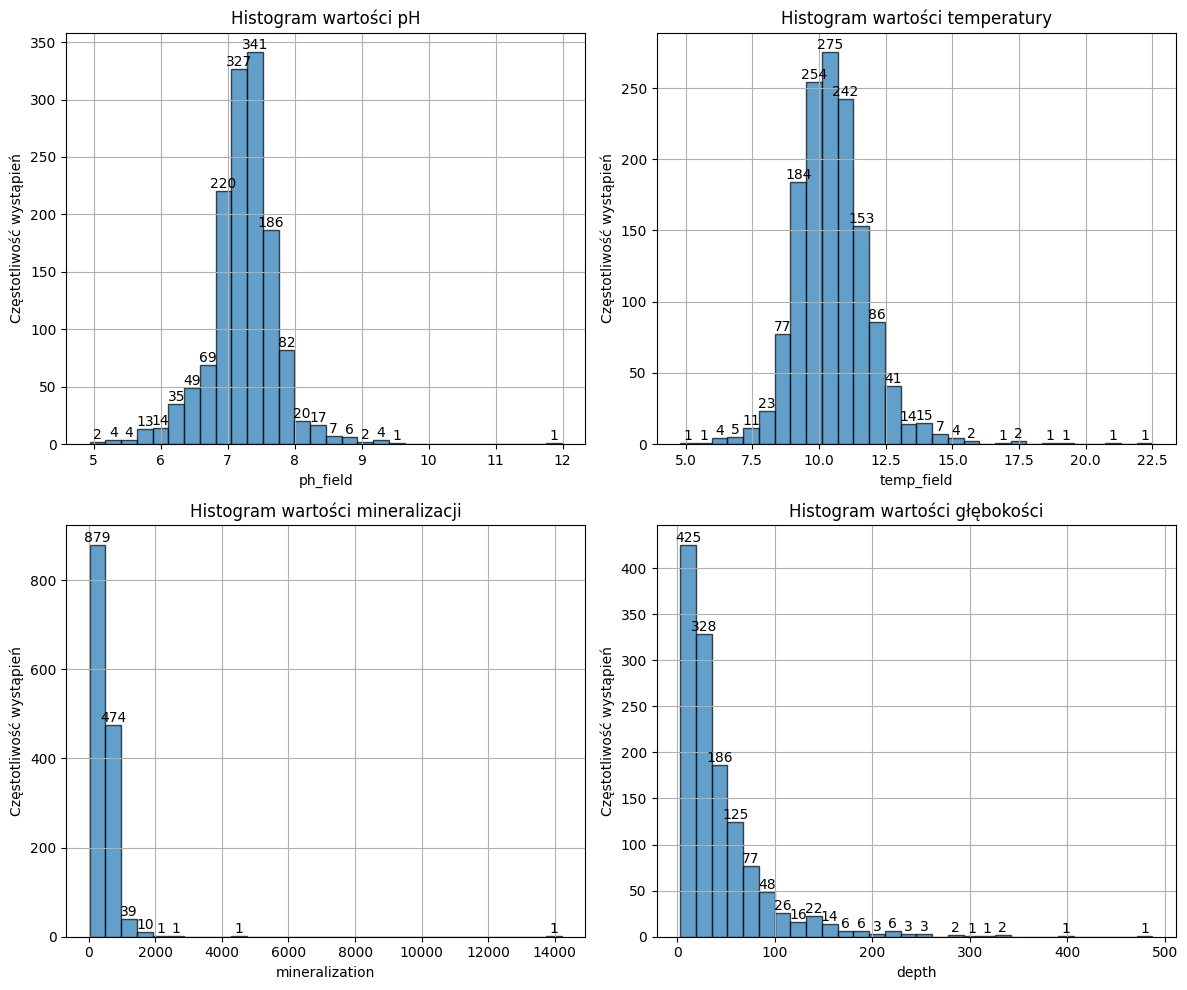

In [18]:
plot_histogram(df_selected)

In [44]:
# df_selected = df_selected[df_selected['mineralization'] < 3500]
df = df_selected[df_selected['mineralization'] > 10000]
# df = df_selected[df_selected['ph_field'] > 8]


In [45]:
df.head()

,ph_field,temp_field,mineralization,depth,City,Region,Latitude,Longitude,color


In [38]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

poland_map = folium.Map(location=[52.2297, 21.0122], zoom_start=6)

poland_map = folium.Map(location=[52.2297, 21.0122], zoom_start=6)

# Normalize mineralization values for colormap mapping
min_val = df_selected['mineralization'].min()
max_val = df_selected['mineralization'].max()
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
cmap = cm.get_cmap('viridis')  # Use viridis colormap

# Create a color mapping for mineralization
df_selected['color'] = df_selected['mineralization'].apply(lambda x: mcolors.to_hex(cmap(norm(x))))

# Add markers for each location
for _, row in df_selected.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=0.8,
        popup=folium.Popup(f"City: {row['City']}<br>Mineralization: {row['mineralization']}", parse_html=True)
    ).add_to(poland_map)

# Add a legend
legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: auto;
    padding: 10px;
    background-color: white;
    border: 2px solid black;
    border-radius: 5px;
    z-index:9999;
    font-size:14px;
">
    <b>Mineralization Legend</b><br>
    <i style='background:{mcolors.to_hex(cmap(0))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> Low ({min_val:.2f})<br>
    <i style='background:{mcolors.to_hex(cmap(0.5))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> Medium ({(max_val+min_val)/2:.2f})<br>
    <i style='background:{mcolors.to_hex(cmap(1))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> High ({max_val:.2f})<br>
</div>
"""

# Add the legend to the map
# poland_map.get_root().html.add_child(folium.Element(legend_html))

# Save and display the map
poland_map.save('poland_mineralization_map_with_values.html')

C:\Users\oicmy\AppData\Local\Temp\ipykernel_89800\2234194021.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Use viridis colormap


In [36]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

poland_map = folium.Map(location=[52.2297, 21.0122], zoom_start=6)

poland_map = folium.Map(location=[52.2297, 21.0122], zoom_start=6)

# Normalize mineralization values for colormap mapping
min_val = df_selected['ph_field'].min()
max_val = df_selected['ph_field'].max()
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
cmap = cm.get_cmap('viridis')  # Use viridis colormap

# Create a color mapping for mineralization
df_selected['color'] = df_selected['ph_field'].apply(lambda x: mcolors.to_hex(cmap(norm(x))))

# Add markers for each location
for _, row in df_selected.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=0.8,
        popup=folium.Popup(f"City: {row['City']}<br>ph: {row['ph_field']}", parse_html=True)
    ).add_to(poland_map)

# Add a legend
legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: auto;
    padding: 10px;
    background-color: white;
    border: 2px solid black;
    border-radius: 5px;
    z-index:9999;
    font-size:14px;
">
    <b>Mineralization Legend</b><br>
    <i style='background:{mcolors.to_hex(cmap(0))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> Low ({min_val:.2f})<br>
    <i style='background:{mcolors.to_hex(cmap(0.5))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> Medium ({(max_val+min_val)/2:.2f})<br>
    <i style='background:{mcolors.to_hex(cmap(1))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> High ({max_val:.2f})<br>
</div>
"""

# Add the legend to the map
# poland_map.get_root().html.add_child(folium.Element(legend_html))

# Save and display the map
poland_map.save('poland_ph_map_with_values.html')

C:\Users\oicmy\AppData\Local\Temp\ipykernel_89800\1360329014.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Use viridis colormap


In [40]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

poland_map = folium.Map(location=[52.2297, 21.0122], zoom_start=6)

poland_map = folium.Map(location=[52.2297, 21.0122], zoom_start=6)

# Normalize mineralization values for colormap mapping
min_val = df_selected['temp_field'].min()
max_val = df_selected['temp_field'].max()
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
cmap = cm.get_cmap('viridis')  # Use viridis colormap

# Create a color mapping for mineralization
df_selected['color'] = df_selected['temp_field'].apply(lambda x: mcolors.to_hex(cmap(norm(x))))

# Add markers for each location
for _, row in df_selected.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=0.8,
        popup=folium.Popup(f"City: {row['City']}<br>temp: {row['temp_field']}", parse_html=True)
    ).add_to(poland_map)

# Add a legend
legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: auto;
    padding: 10px;
    background-color: white;
    border: 2px solid black;
    border-radius: 5px;
    z-index:9999;
    font-size:14px;
">
    <b>Mineralization Legend</b><br>
    <i style='background:{mcolors.to_hex(cmap(0))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> Low ({min_val:.2f})<br>
    <i style='background:{mcolors.to_hex(cmap(0.5))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> Medium ({(max_val+min_val)/2:.2f})<br>
    <i style='background:{mcolors.to_hex(cmap(1))};width:10px;height:10px;display:inline-block;border-radius:50%;margin-right:5px;'></i> High ({max_val:.2f})<br>
</div>
"""

# Add the legend to the map
# poland_map.get_root().html.add_child(folium.Element(legend_html))

# Save and display the map
poland_map.save('poland_temp_map_with_values.html')

C:\Users\oicmy\AppData\Local\Temp\ipykernel_89800\1820228552.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Use viridis colormap
